# Descripción del proyecto
La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

## Paso 1. Importación de librerías y carga de dataset.

In [1]:
# Importar librerías

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

In [2]:
# Cargar dataset

gym_data = pd.read_csv('/datasets/gym_churn_us.csv')

## Paso 2. Llevar a cabo el análisis exploratoriode datos (EDA)

* Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar (utiliza el método describe()).
* Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).
* Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.
* Crea una matriz de correlación y muéstrala.

In [3]:
# Dataset data 

gym_data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


### Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar.

In [4]:
# Verificar datos ausentes y obtener estadísticas

gym_data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


* El dataset no contiene valores ausentes (count es 4000 para todas las columnas).
* La variable Churn (cancelación) tiene una media de 0.265, lo que significa que aproximadamente el 26.5% de los clientes cancelaron su membresía.
* Las características como Contract_period, Avg_additional_charges_total, Lifetime, y Avg_class_frequency_total muestran variabilidad significativa, lo que puede ser importante para el análisis de la cancelación.

### Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron.

In [5]:
# Valores medios de las características en dos grupos: cancelación (Churn) y no cancelación

churn_group_means = gym_data.groupby('Churn').mean()
churn_group_means

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


* Los clientes que no cancelaron (Churn = 0) tienen un Contract_period medio de aproximadamente 5.75 meses, mientras que los que cancelaron (Churn = 1) tienen un período medio de 1.73 meses.
* Los clientes que se quedaron (Churn = 0) tienen una frecuencia de clase media más alta tanto a lo largo de su vida (Avg_class_frequency_total) como en el mes actual (Avg_class_frequency_current_month).
* La cantidad total gastada en servicios adicionales (Avg_additional_charges_total) es mayor para los clientes que no cancelaron.

### Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.

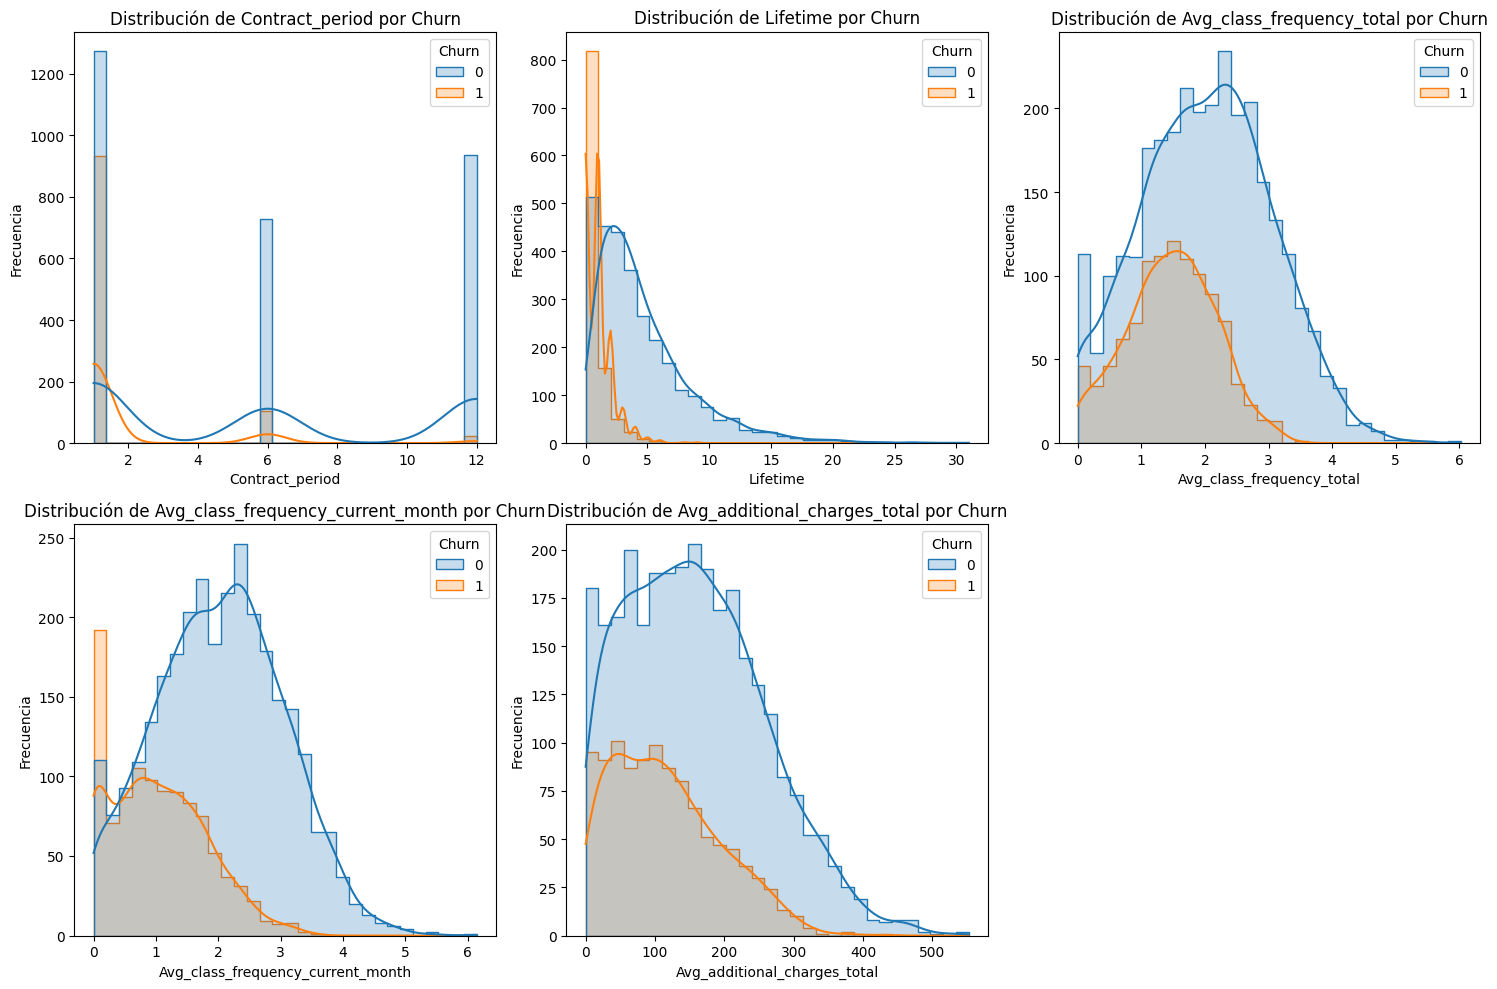

In [6]:
# Gráfico de histograma

plt.figure(figsize=(15, 10))

features = ['Contract_period', 'Lifetime', 'Avg_class_frequency_total', 
            'Avg_class_frequency_current_month', 'Avg_additional_charges_total']

for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=gym_data, x=feature, hue='Churn', kde=True, element="step", bins=30)
    plt.title(f'Distribución de {feature} por Churn')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

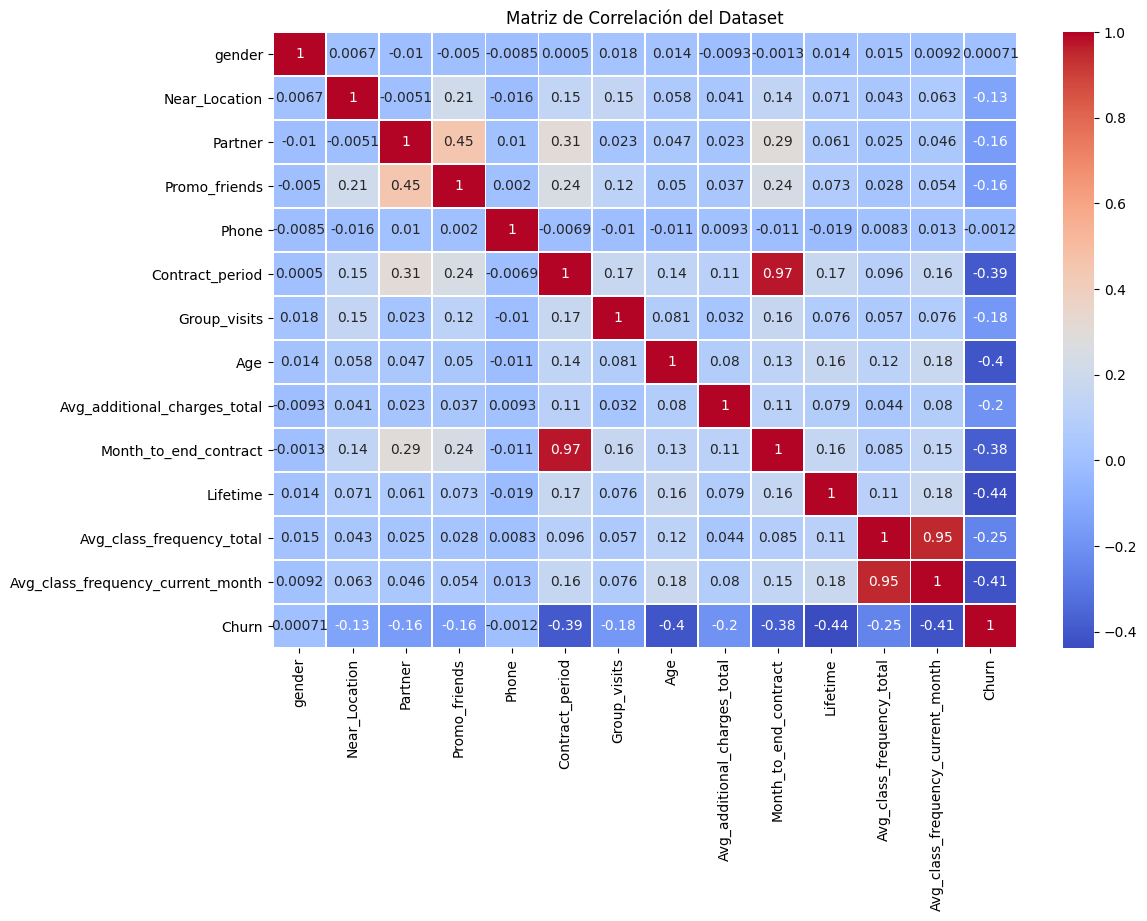

In [7]:
# Crear una matriz de correlación

plt.figure(figsize=(12, 8))
correlation_matrix = gym_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación del Dataset')
plt.show()

## Paso 3. Construir un modelo para predecir la cancelación de usuarios

Crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente.

* Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().
* Entrena el modelo en el set de entrenamiento con dos métodos:
    * regresión logística;
    * bosque aleatorio.
* Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos. ¿Qué modelo dio mejores resultados?

### Divide los datos en conjuntos de entrenamiento y validación.

In [8]:
# Separar las características y la variable objetivo

X = gym_data.drop('Churn', axis=1)
y = gym_data['Churn']

# Dividir los datos en conjuntos de entrenamiento y validación (80% entrenamiento, 20% validación)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

### Entrena el modelo en el set de entrenamiento con dos métodos:
* regresión logística;
* bosque aleatorio.

In [9]:
# Entrenamiento de los modelos

# Regresión Logística
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Bosque Aleatorio
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos. ¿Qué modelo dio mejores resultados?

In [10]:
# Evaluación de los modelos

# Predicciones
y_pred_logistic = logistic_model.predict(X_val_scaled)
y_pred_rf = rf_model.predict(X_val)

# Evaluación del modelo de Regresión Logística
logistic_accuracy = accuracy_score(y_val, y_pred_logistic)
logistic_precision = precision_score(y_val, y_pred_logistic)
logistic_recall = recall_score(y_val, y_pred_logistic)

# Evaluación del modelo de Bosque Aleatorio
rf_accuracy = accuracy_score(y_val, y_pred_rf)
rf_precision = precision_score(y_val, y_pred_rf)
rf_recall = recall_score(y_val, y_pred_rf)

In [11]:
# Resultados

results = {
    'Modelo': ['Regresión Logística', 'Bosque Aleatorio'],
    'Exactitud (Accuracy)': [logistic_accuracy, rf_accuracy],
    'Precisión (Precision)': [logistic_precision, rf_precision],
    'Recall': [logistic_recall, rf_recall]
}

results_df = pd.DataFrame(results)
results_df

,Modelo,Exactitud (Accuracy),Precisión (Precision),Recall
0,Regresión Logística,0.91625,0.872928,0.782178
1,Bosque Aleatorio,0.91000,0.849462,0.782178


* Los resultados indican que ambos modelos tienen un desempeño parecido en términos de Precisión y Recall, con la Regresión Logística ligeramente superando al Bosque Aleatorio en exactitud y precisión.

## Paso 4. Crear clústeres de usuarios/as
Deja de lado la columna con datos sobre la cancelación e identifica los clústeres de objetos (usuarios/as):

* Estandariza los datos.
* Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.
* Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes.
* Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?
* Traza distribuciones de características para los clústeres. ¿Notas algo?
* Calcula la tasa de cancelación para cada clúster. ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

### Estandariza los datos.

In [12]:
# Estandarizar los datos sin la columna de cancelación

X_clustering = gym_data.drop('Churn', axis=1)
X_clustering_scaled = scaler.fit_transform(X_clustering)

### Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.

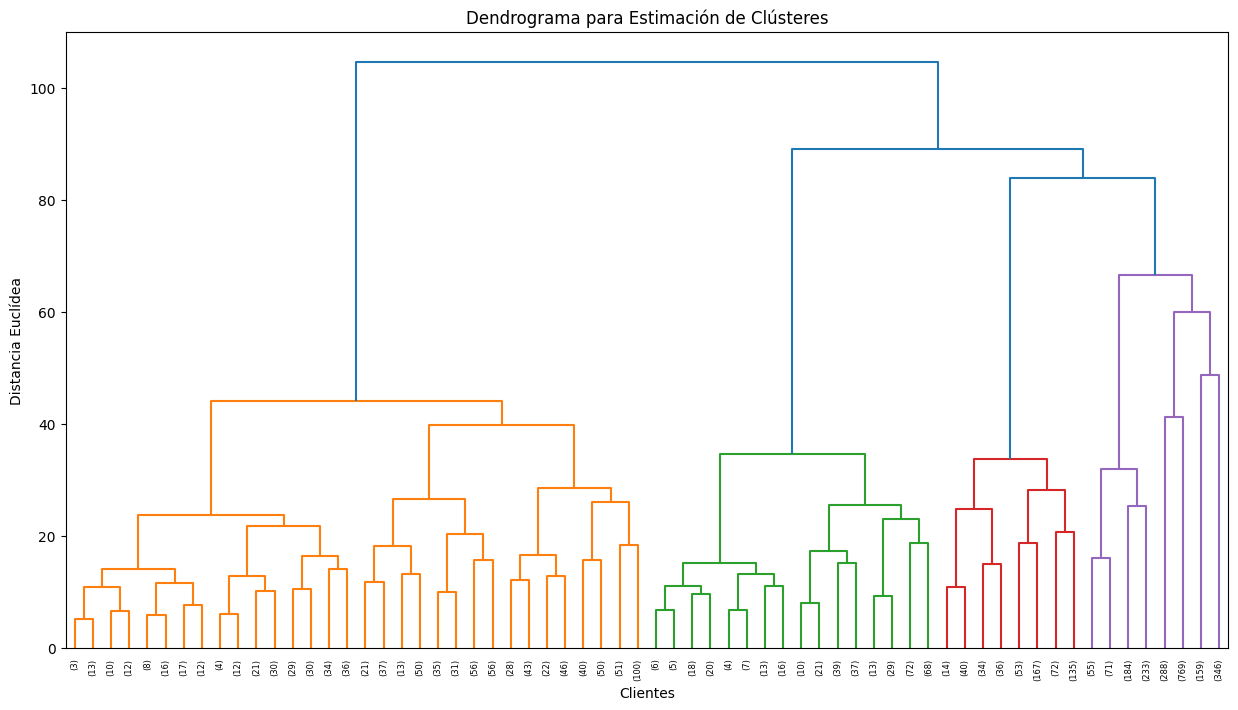

In [13]:
# Crear un dendrograma

plt.figure(figsize=(15, 8))
linked = linkage(X_clustering_scaled, method='ward')
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrograma para Estimación de Clústeres')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclídea')
plt.show()

### Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes.

In [14]:
# Entrenar el modelo de clustering con K-means con 5 clusters

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_clustering_scaled)

gym_data['Cluster'] = clusters

### Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?

In [15]:
# Paso 4: Valores medios de características por clúster

cluster_means = gym_data.groupby('Cluster').mean()
cluster_means

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Cluster,,,,,,,,,,,,,,
0,0.502370,0.949447,0.829384,0.998420,1.0,3.097946,0.448657,29.104265,141.774331,2.887836,3.772512,1.770536,1.669581,0.246445
1,0.554556,0.849269,0.263217,0.052868,1.0,2.606299,0.436445,30.008999,159.774265,2.419573,4.780652,2.745505,2.733173,0.089989
2,0.499422,0.937572,0.737572,0.478613,1.0,11.854335,0.546821,29.905202,163.509804,10.812717,4.677457,2.006405,1.998179,0.021965
3,0.485738,0.718011,0.299919,0.018745,1.0,1.914425,0.276284,28.083945,129.496414,1.821516,2.195599,1.225192,0.967967,0.572942
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839


* El clúster 3 tiene una tasa de cancelación significativamente más alta (57.3%), lo que indica que los usuarios en este clúster son más propensos a cancelar.
* El clúster 2 tiene la tasa de cancelación más baja (2.2%), lo que sugiere que estos usuarios son los más leales.

### Traza distribuciones de características para los clústeres. ¿Notas algo?

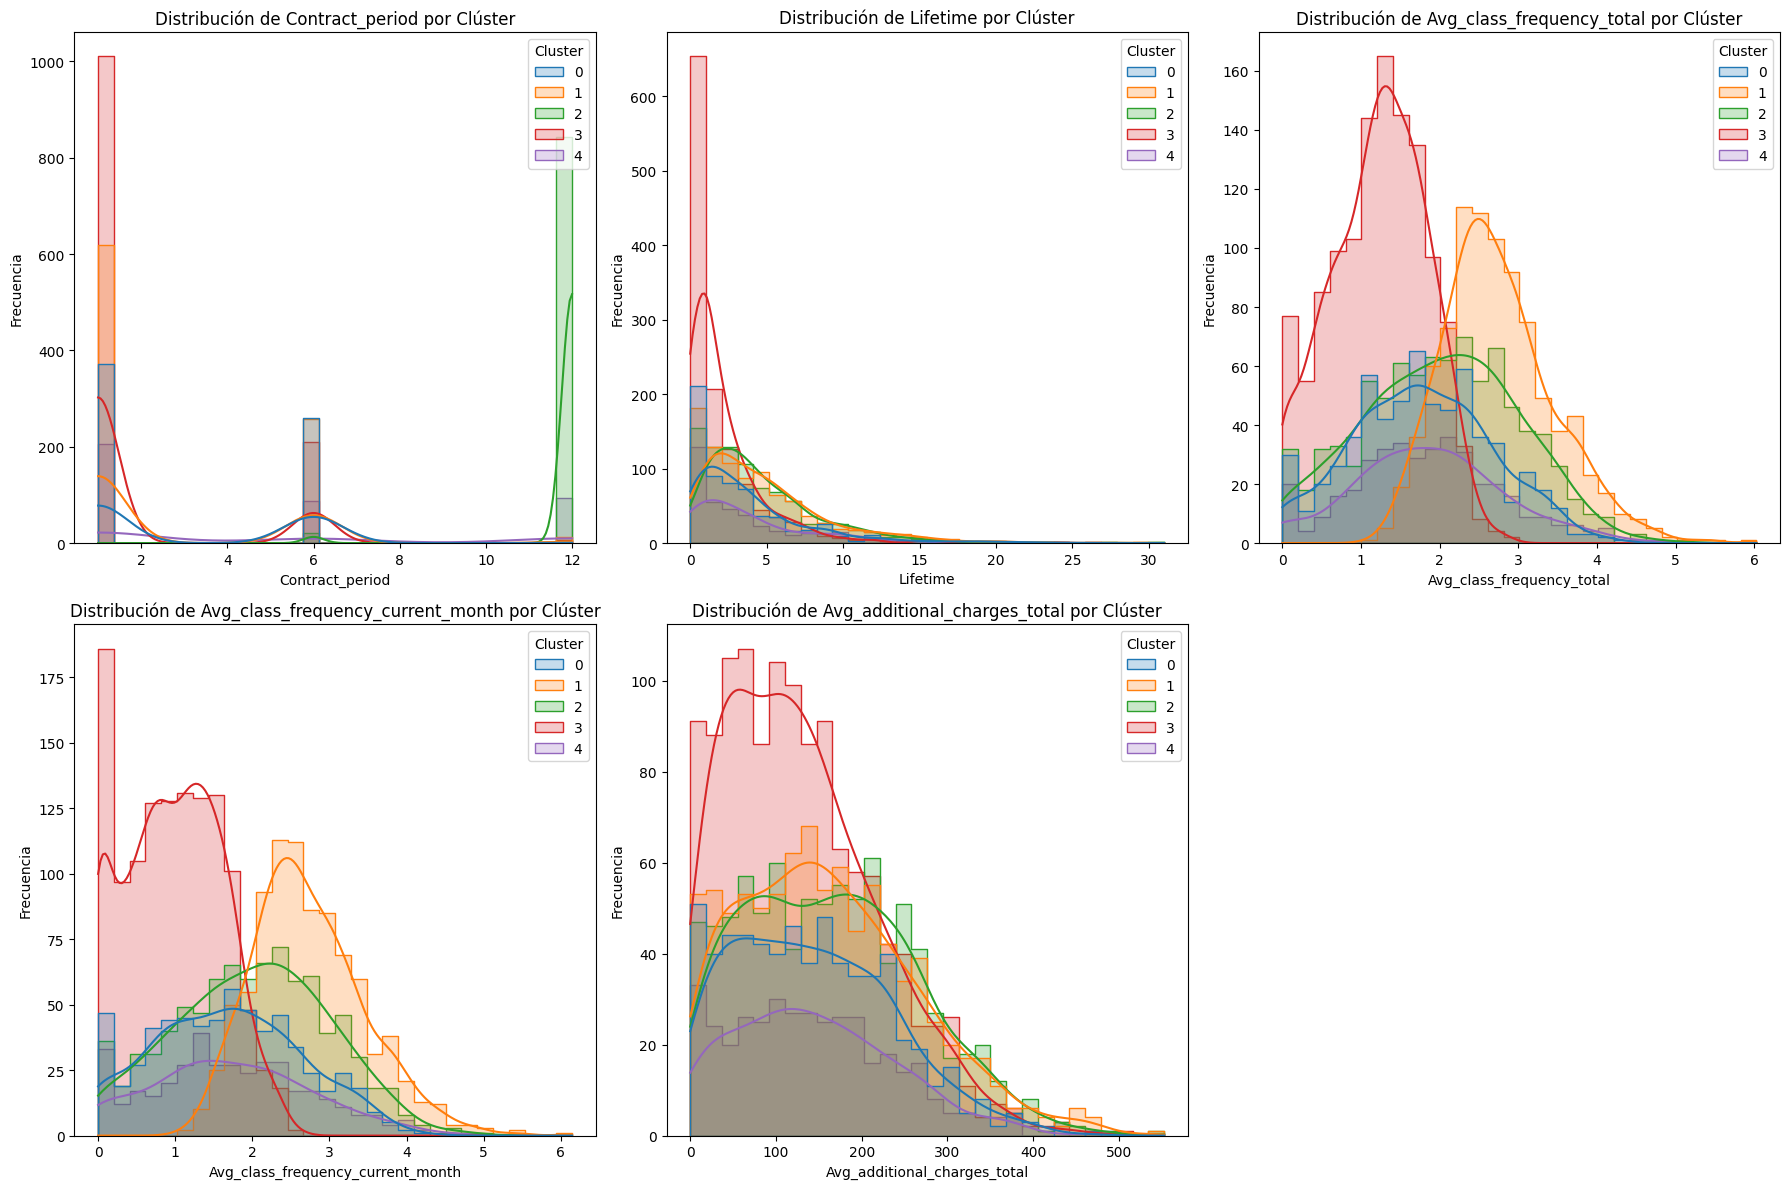

In [16]:
# Traza distribuciones de características para los clústeres

plt.figure(figsize=(18, 12))

features_to_plot = ['Contract_period', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Avg_additional_charges_total']

for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=gym_data, x=feature, hue='Cluster', kde=True, element='step', palette='tab10', bins=30)
    plt.title(f'Distribución de {feature} por Clúster')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

* Los usuarios en el clúster 2 tienden a tener contratos significativamente más largos en comparación con otros clústeres, lo que coincide con su baja tasa de cancelación. Por el contrario, el clúster 3 muestra una alta concentración de contratos de corto plazo, lo que podría explicar su alta tasa de cancelación.

* Similar al período de contrato, el clúster 2 tiene un "Lifetime" más alto, indicando que estos usuarios han sido miembros por más tiempo. El clúster 3 tiene usuarios con un "Lifetime" más corto, lo que podría relacionarse con la falta de compromiso.

* La frecuencia de clases tanto total como en el mes actual es mayor para el clúster 1, por lo tanto estos usuarios son más activos, lo que se refleja en una tasa de cancelación baja.

* Cluster 3 es el más propenso a irse debido a sus bajas métricas de compromiso, mientras que Cluster 2 es el más leal.

### Calcula la tasa de cancelación para cada clúster. ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

In [17]:
# Calcular la tasa de cancelación para cada clúster

churn_rate_per_cluster = gym_data.groupby('Cluster')['Churn'].mean().reset_index()
churn_rate_per_cluster.columns = ['Cluster', 'Churn Rate']

churn_rate_per_cluster

,Cluster,Churn Rate
0,0,0.246445
1,1,0.089989
2,2,0.021965
3,3,0.572942
4,4,0.266839


* Clúster 0: Tasa de cancelación alrededor del 24.6%. Este grupo tiene una tasa de cancelación moderada.
* Clúster 1: Tasa de cancelación baja, aproximadamente 9.0%. Este grupo es más leal y está compuesto por usuarios con alta frecuencia de visitas.
* Clúster 2: Tasa de cancelación muy baja, alrededor del 2.2%. Este grupo es el más leal, con clientes que tienen contratos de larga duración y alto compromiso.
* Clúster 3: Tasa de cancelación alta, aproximadamente 57.3%. Este grupo es más propenso a irse debido a la baja frecuencia de visitas y corta duración de contrato.
* Clúster 4: Tasa de cancelación alrededor del 26.7%. Este grupo tiene una tasa de cancelación moderada.

* Grupos Propensos a Irse: Clúster 3 es el más propenso a cancelar su membresía, seguido por los clústeres 0 y 4.
* Grupos Leales: Clústeres 1 y 2 muestran alta lealtad y baja tasa de cancelación, sugiriendo que estas estrategias deben centrarse en mantener su compromiso y atraer a clientes similares.

## Paso 5. Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes
Llega a conclusiones y formula recomendaciones con respecto a la estrategia para la interacción y retención de clientes.

No necesitas entrar en detalles. Bastarán tres o cuatro principios esenciales y ejemplos de su implementación en forma de pasos de marketing específicos.

* Los clientes con contratos más largos (6 meses o 1 año) muestran una menor tasa de cancelación. Se recomienda ofrecer descuentos o beneficios adicionales para quienes opten por contratos de mayor duración.

* Los clientes que participan regularmente en actividades y clases grupales tienen una mayor tasa de retención. Se recomienda implementar programas que recompensen la frecuencia de asistencia, como puntos que se pueden canjear por productos del gimnasio o eventos especiales.

* Los clientes que tienen un "Lifetime" corto y baja frecuencia de visitas al inicio son más propensos a cancelar. Se recomienda crear programas de bienvenida y seguimiento personalizado durante los primeros meses.

* Utilizar el análisis de clústeres para identificar grupos de clientes con características y comportamientos similares y diseñar estrategias de marketing específicas para cada segmento. Se recomienda enviar campañas de marketing dirigidas a los clústeres más propensos a cancelar ofreciendo promociones especiales.